 About the Dataset 
The stock market has always intrigued me. Numbers, Charts, High-pressure environments, thinking on your feet, Wall Street, Hedge funds all of it!.The dataset has around 60 features which includes features extracted from OHLC, other index prices such as QQQ(Nasdaq-100 ETF) & S&P 500, technical Indicators such as Bollinger bands, EMA(Exponential Moving Averages, Stocastic %K oscillator, RSI etc). The stock market depends upon many many factors such as previous days performance, Global financial news, Public sentiment about the company, Mergers & Acquisitions, Moving Averages, etc.I will use the Google Stock Data for this Project from kaggle.


Problem Statement :
  1.I want to analyse the data,clean and prepare for model training.
  2.I want to build model to predict the Stock market movement using deep learning techniques
  3.To be precise, I want to generate realistic buy/sell signals for the next day based on future stock price estimates using   time series modeling.A time series is a sequence of data points collected or recorded over successive and equally spaced intervals of time.
  4.I want to implement this using Tensor flow open source framework and want to dig deeper on Recurrent Neural Network.


Variables:

Date: Represents the date of the relevant Transaction Day.
Open: Represents the initial share price of the relevant Trading Day.
High: Represents the highest price of the relevant Trading Day.
Low: It represents the lowest price of the relevant trading day.
Close: It represents the closing price of the stock on the relevant trading day.
Adj Close: Represents the adjusted closing price of the stock of the relevant trading day.
Volume: It represents the trading volume information of the relevant trading day

# Load the data

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# importing libraries
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


In [3]:
#Load the data as a Pandas data frame and ensure that it imported correctly.
df=pd.read_csv("TSLA.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


<AxesSubplot:title={'center':'Tesla stock price'}, xlabel='Date', ylabel='USD'>

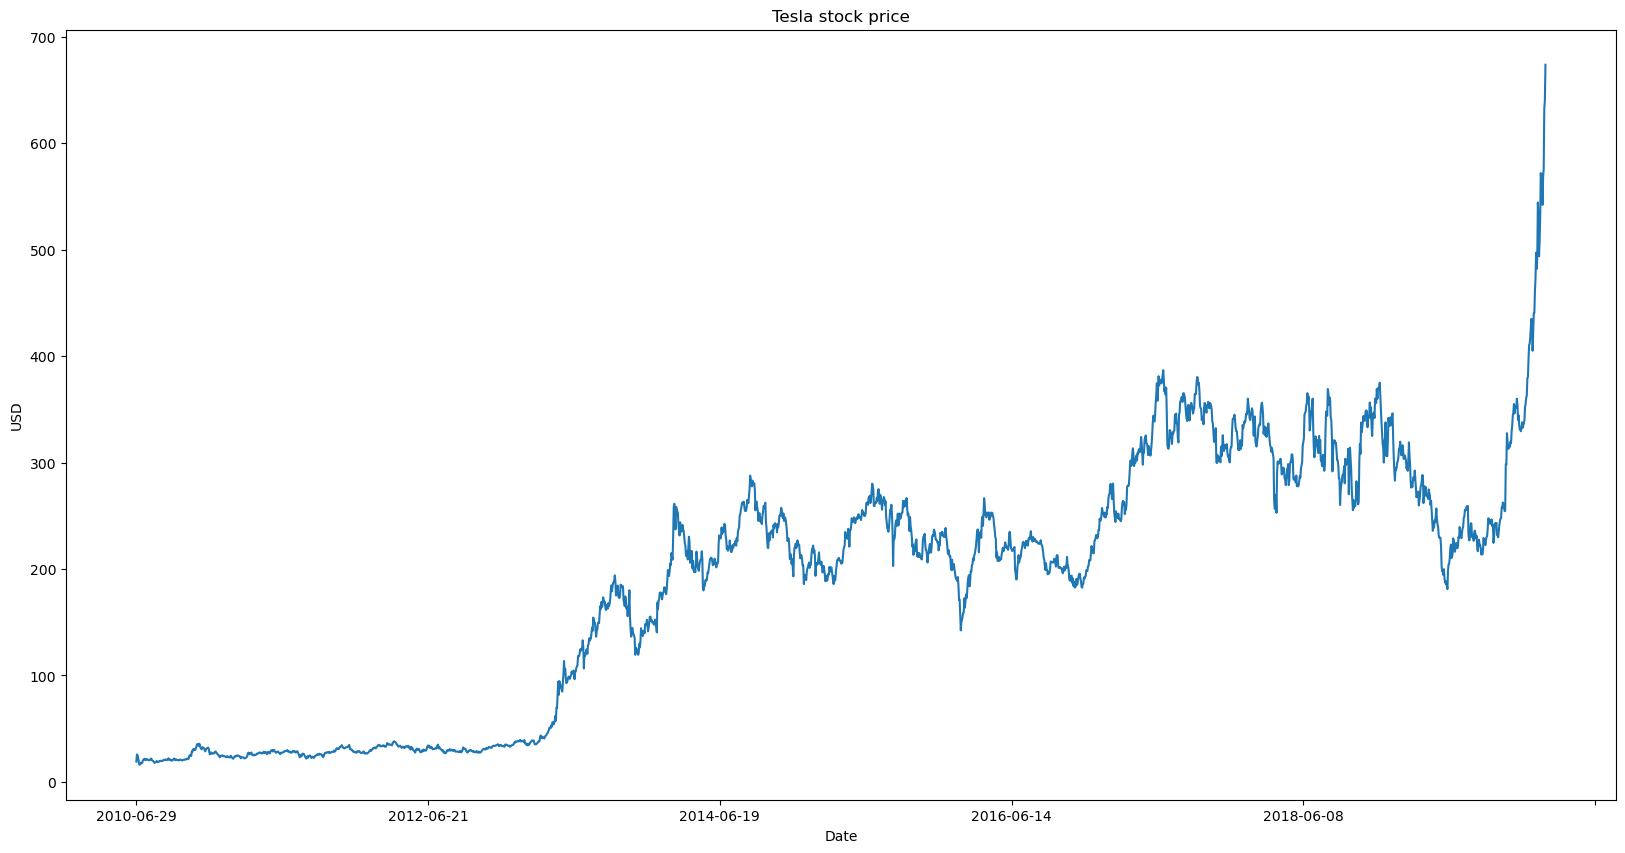

In [4]:
df.plot(x="Date", y="Open", title="Tesla stock price", ylabel="USD", legend=False, figsize=(20, 10))

<AxesSubplot:title={'center':'Tesla stock price'}, xlabel='Date', ylabel='USD'>

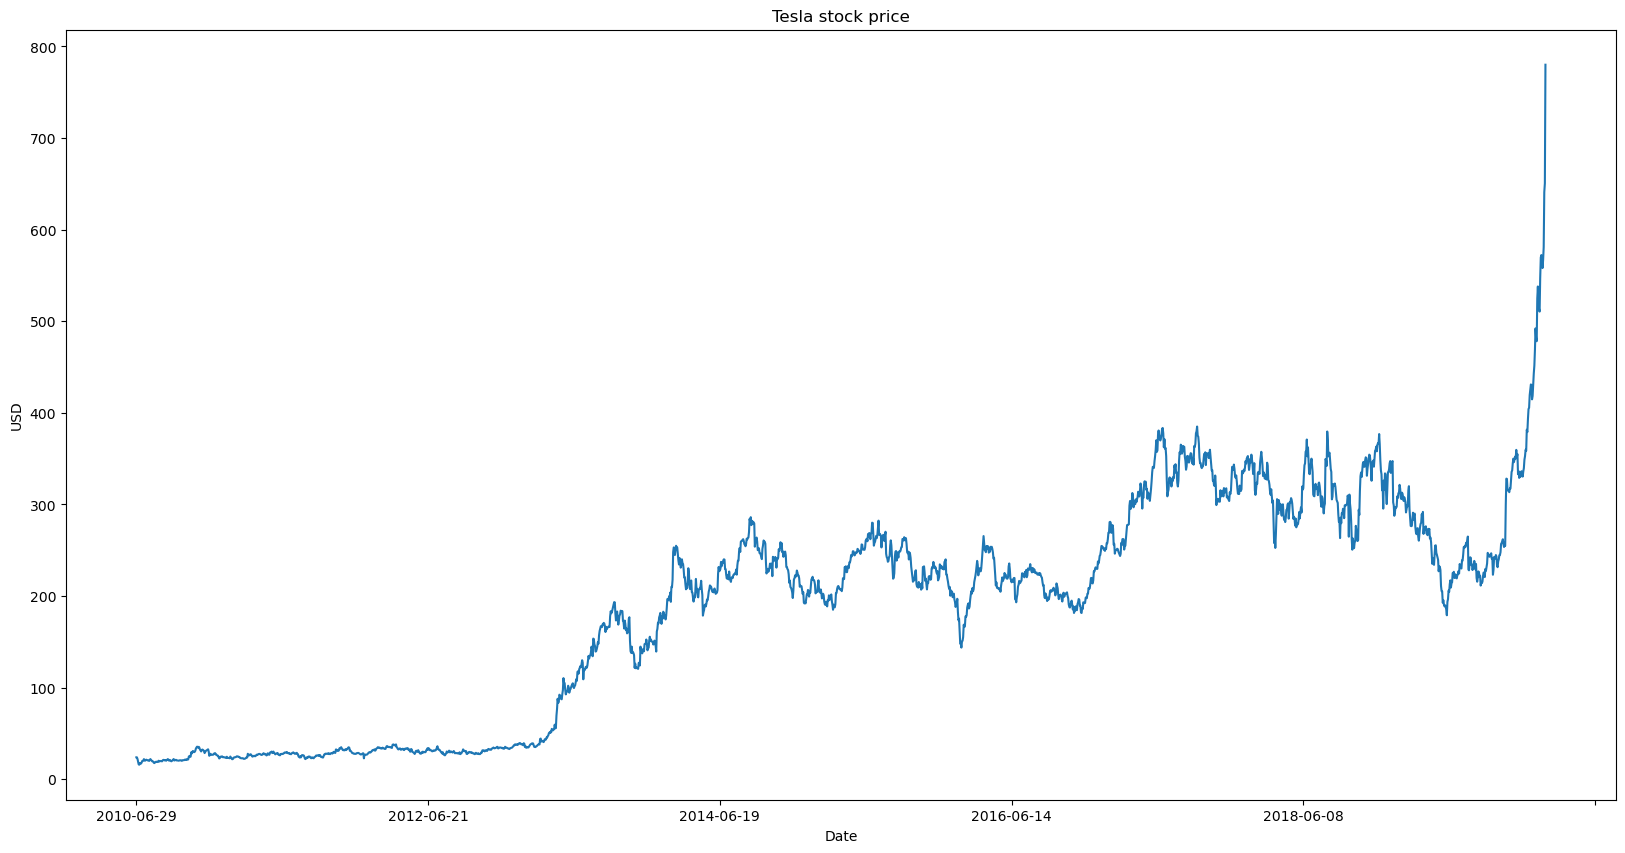

In [5]:

df.plot(x="Date", y="Adj Close", title="Tesla stock price", ylabel="USD", legend=False, figsize=(20, 10))

<AxesSubplot:title={'center':'Tesla stock price'}, xlabel='Date', ylabel='USD'>

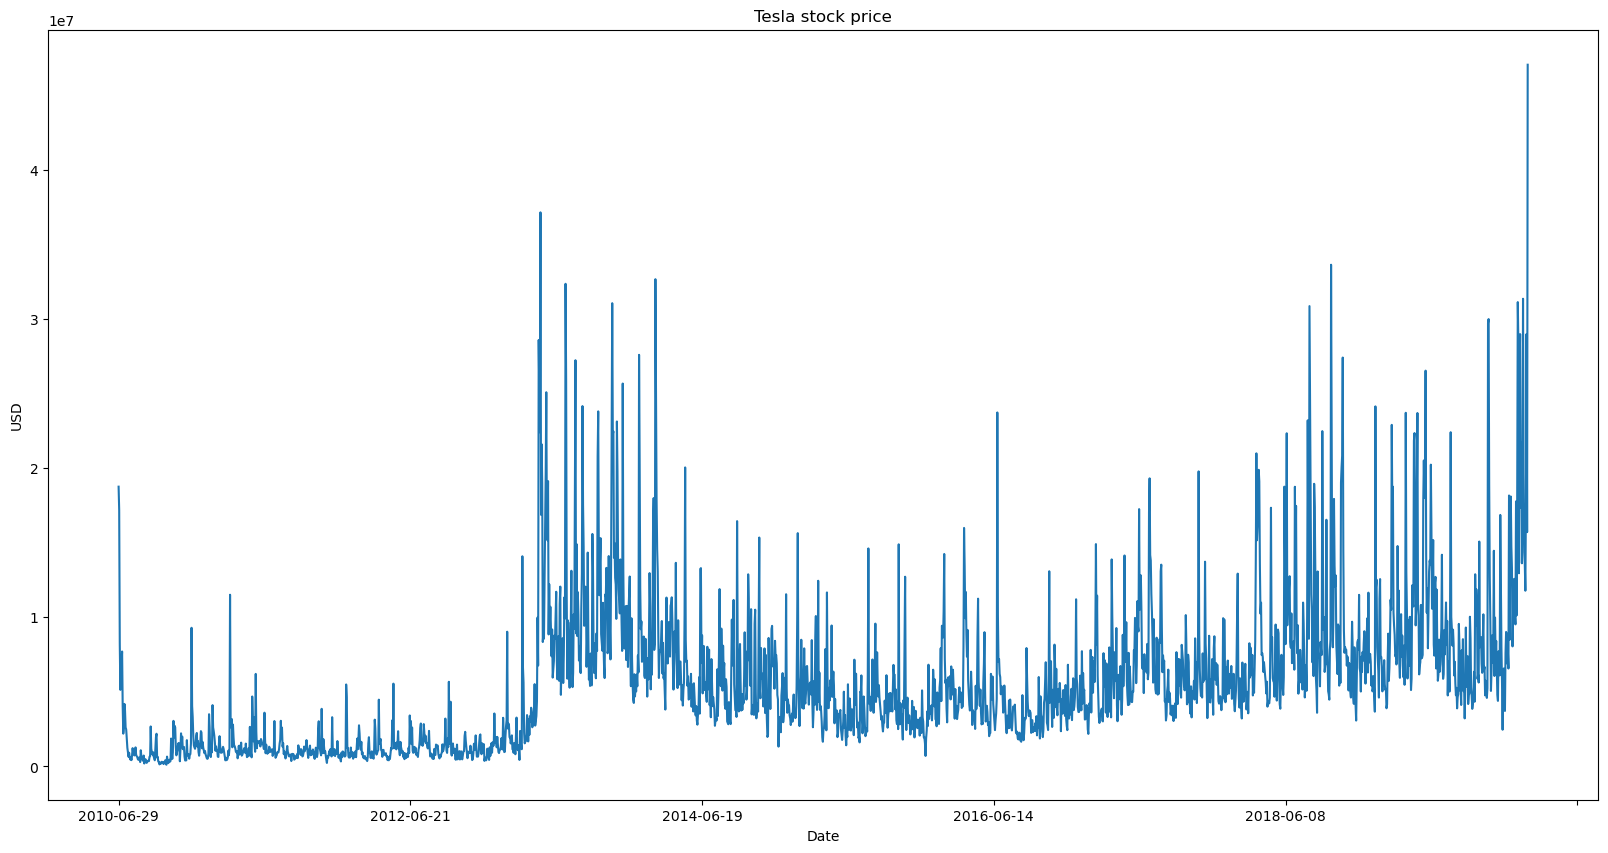

In [6]:
df.plot(x="Date", y="Volume", title="Tesla stock price", ylabel="USD", legend=False, figsize=(20, 10))

<AxesSubplot:>

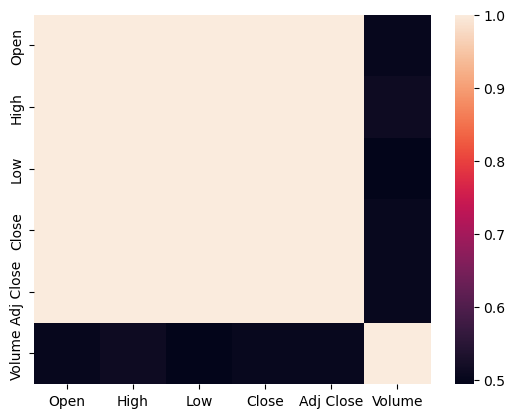

In [7]:

# Create a heatmap of the correlation between variables

corr = df.corr()
sns.heatmap(corr)


Above  visualize the correlation between different variables in a dataset.A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables.
In other words, it reflects how similar the measurements of two or more variables are across a dataset.
We can decide on the feature selection based on above correlation coefficients.

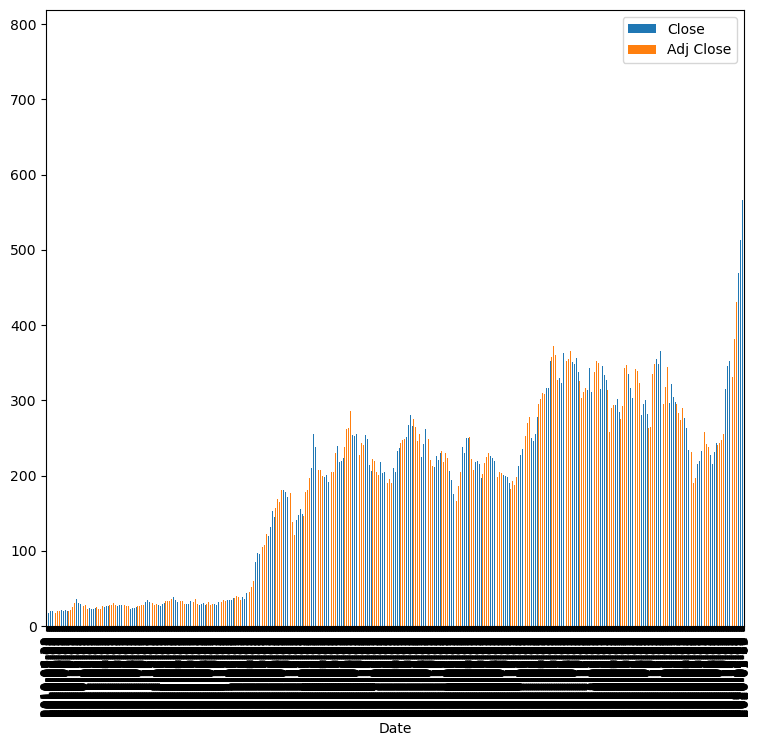

In [8]:
# plot the dataframe
df.plot(x="Date", y=["Close", "Adj Close"], kind="bar", figsize=(9, 8))
plt.show()

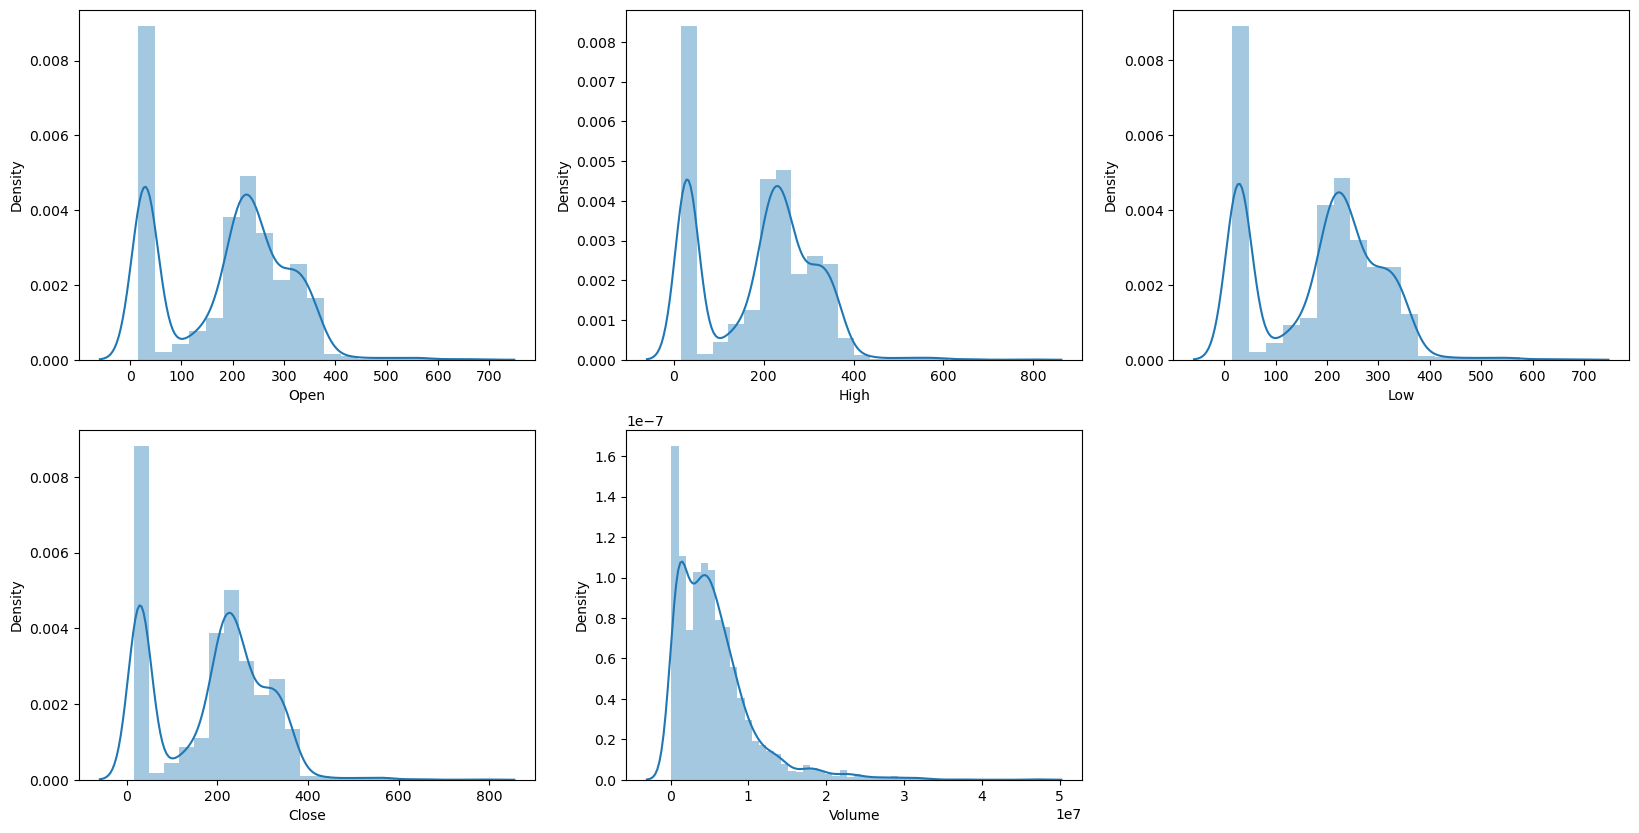

In [9]:
import seaborn as sb

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

## Project_MileStone_2


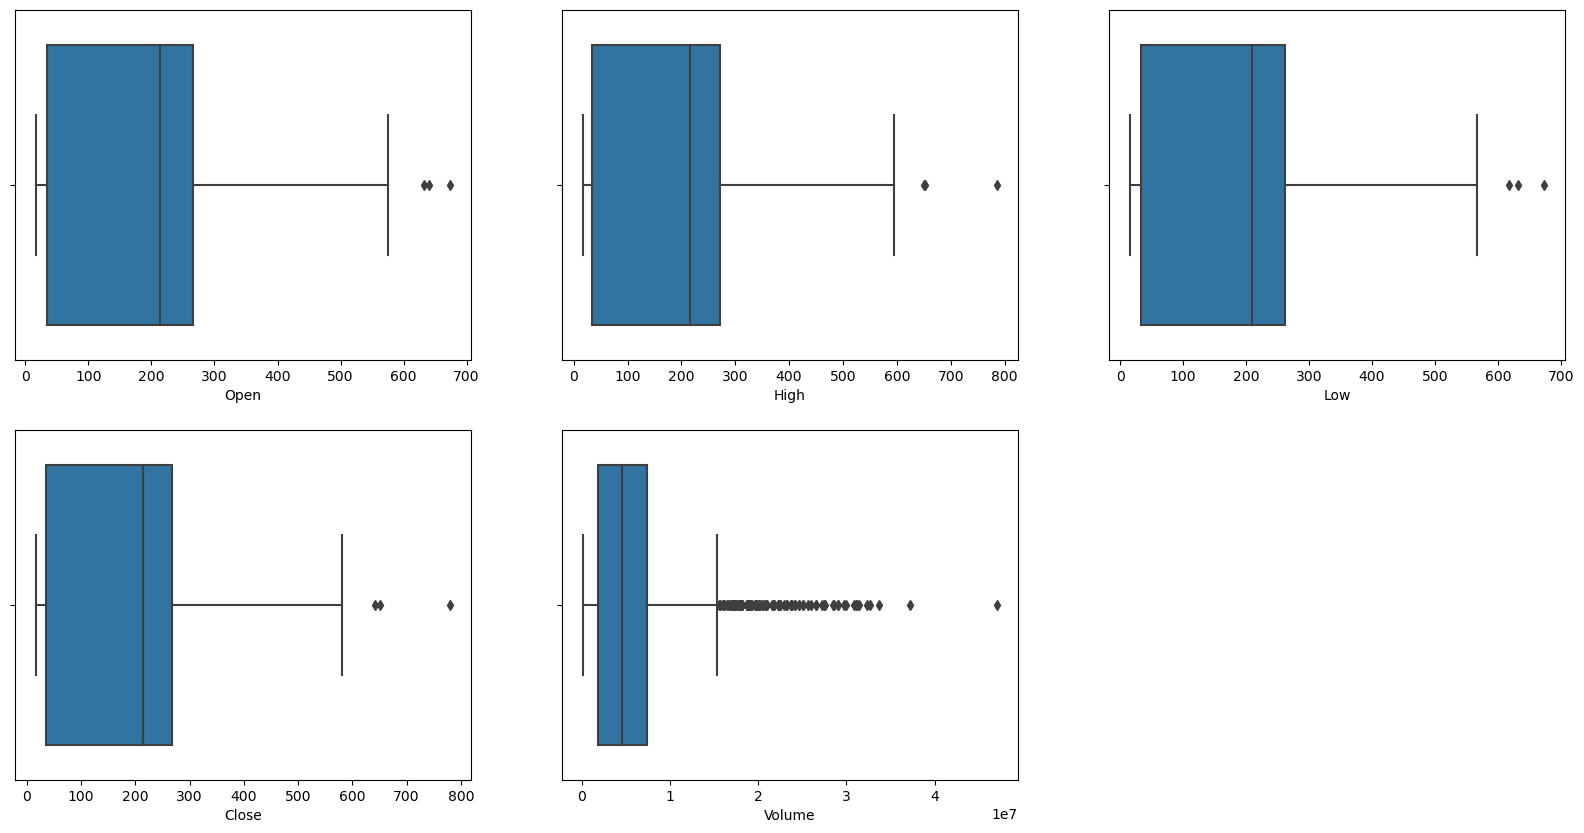

In [10]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


I can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [11]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6


In [12]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

In [13]:
data_grouped = df.groupby('year').mean()
data_grouped

,Open,High,Low,Close,Adj Close,Volume,month,day,is_quarter_end
year,,,,,,,,,
2010,23.408000,24.077231,22.646077,23.341846,23.341846,1.579762e+06,9.453846,16.030769,0.346154
2011,26.821984,27.380238,26.194167,26.804762,26.804762,1.290615e+06,6.547619,15.634921,0.345238
2012,31.203120,31.809160,30.545880,31.168600,31.168600,1.229796e+06,6.500000,15.776000,0.328000
2013,104.416428,106.853016,101.779881,104.401230,104.401230,8.407722e+06,6.543651,15.650794,0.321429
2014,223.415397,227.449881,219.206111,223.329088,223.329088,6.913973e+06,6.551587,15.761905,0.337302
2015,229.831944,233.381666,226.270635,230.042898,230.042898,4.318325e+06,6.567460,15.750000,0.345238
2016,210.058452,213.433492,206.286151,209.767262,209.767262,4.612546e+06,6.555556,15.682540,0.341270
2017,314.296215,318.450598,309.686972,314.316295,314.316295,6.334786e+06,6.533865,15.800797,0.338645
2018,317.183466,323.693626,310.552311,317.309921,317.309921,8.612107e+06,6.505976,15.796813,0.318725


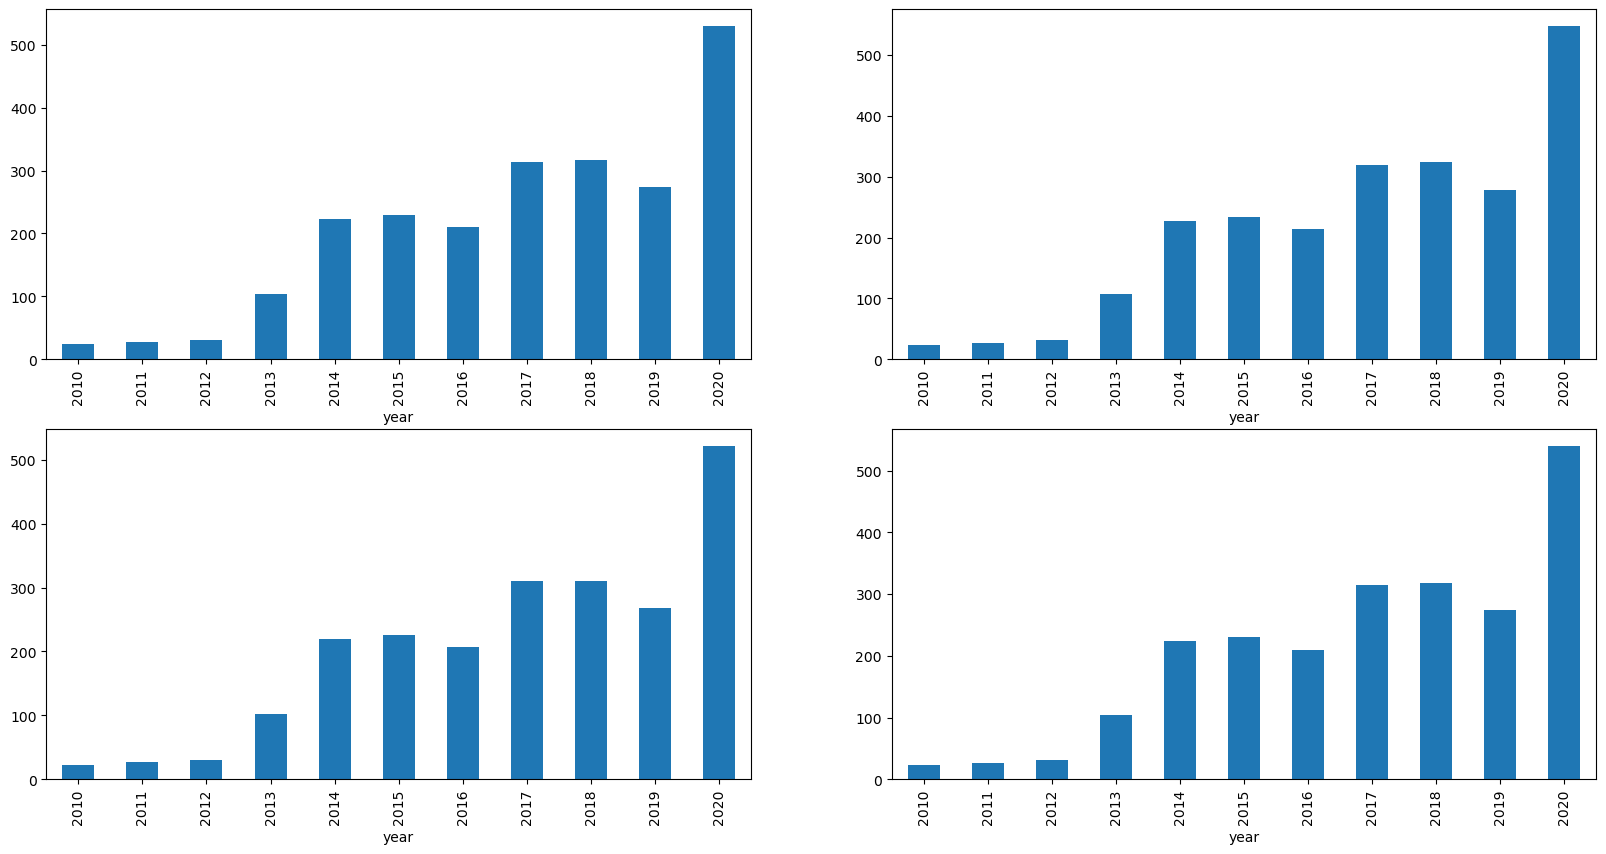

In [14]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [15]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,year,month,day
is_quarter_end,,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,186.085081,5.767062e+06,2014.816213,6.173886,15.710396
1,187.071200,190.232700,183.860262,187.047163,187.047163,5.180154e+06,2014.697500,7.597500,15.825000


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [16]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [17]:
#Creation of the new column "Price difference"

df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
print(df['PriceDiff'])

0        -0.059999
1        -1.870001
2        -2.759998
3        -3.090000
4        -0.310001
           ...    
2411     14.089966
2412     59.820008
2413      9.760009
2414    129.429993
2415           NaN
Name: PriceDiff, Length: 2416, dtype: float64


In [18]:
# Creation of the new column "Daily return"

df['Return'] = df['PriceDiff'] /df['Close']
print(df['Return'])


0      -0.002511
1      -0.078473
2      -0.125683
3      -0.160937
4      -0.019243
          ...   
2411    0.024854
2412    0.102962
2413    0.015231
2414    0.198949
2415         NaN
Name: Return, Length: 2416, dtype: float64


In [19]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
year              0
month             0
day               0
is_quarter_end    0
open-close        0
low-high          0
target            0
PriceDiff         1
Return            1
dtype: int64

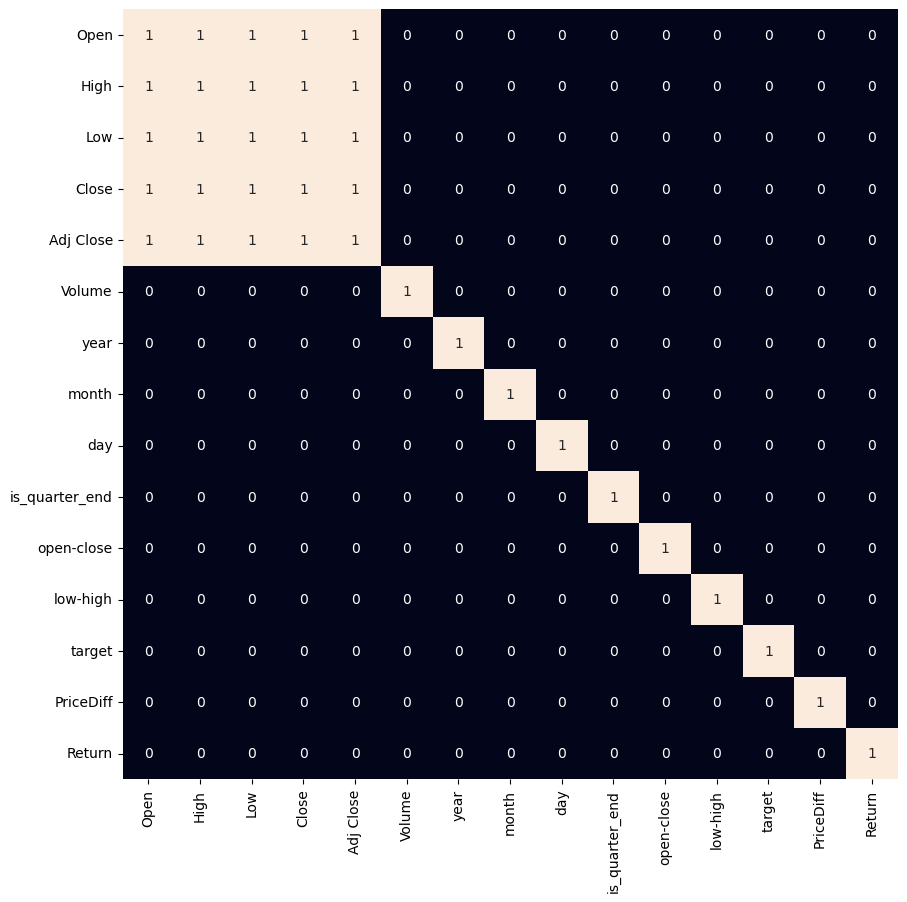

In [20]:
#Checking for factors responsible in overall volume trade
#Performing default correlation using Pearson Method


plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

 Its clear from Correlation Matrix there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [21]:

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [22]:
from sklearn.preprocessing import StandardScaler

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']




In [23]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target,PriceDiff,Return
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,29,1,-4.889999,-7.459999,0,-0.059999,-0.002511
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,30,1,1.960001,-7.120001,0,-1.870001,-0.078473
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,1,0,3.040001,-5.650000,0,-2.759998,-0.125683
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,2,0,3.799999,-4.390001,0,-3.090000,-0.160937
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,6,0,3.889999,-4.170000,0,-0.310001,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,1,28,0,1.589966,-18.729981,1,14.089966,0.024854
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,1,29,0,-5.299988,-22.369995,1,59.820008,0.102962
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,1,30,0,-8.390015,-32.880005,1,9.760009,0.015231
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,1,31,0,-10.570007,-20.479980,1,129.429993,0.198949


In [24]:
### Data Splitting and Normalization

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train1, X_valid, Y_train1, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

NameError: name 'X_train' is not defined

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import xgboost as xgb
import sklearn.metrics as metrics


models = [LogisticRegression(), SVC(kernel='poly', probability=True), xgb.XGBClassifier()]

for i in range(3):
    models[i].fit(X_train1, Y_train1)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train1, models[i].predict_proba(X_train1)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294572363547078
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

#### I want to build a Stock Price Prediction project using TensorFlow. Stock Market price analysis is a Timeseries approach and can be performed using a Recurrent Neural Network.Recursive feature elimination (RFE)

Recursive Feature Elimination (RFE) is known as a wrapper feature selection and employs ML models when computing the relevance scores of the features. RFE firstly trains a model with an entire feature set and computes a relevance score for each feature. In the next step, the feature with the least relevance score is neglected and the model is re-trained to compute new feature relevance scores. This process is continued until the desired number of features remain in the feature set. Therefore, the desired subset size is a parameter that needs to be set before the model initialization. 

### Spliting Data as Train and Validation

In [26]:
length_data = len(df)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2416
Train data length : 1691
Validation data lenth : 725


In [27]:
train_data = df[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1686,2017-03-10,246.210007
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000


In [28]:
#We will get Open column as our dataset

dataset_train = train_data.Open.values
dataset_train.shape

(1691,)

In [29]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1691, 1)

In [30]:
validation_data = df[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1691,2017-03-17,264.000000
1692,2017-03-20,260.600006
1693,2017-03-21,262.829987
1694,2017-03-22,251.559998
1695,2017-03-23,255.389999
...,...,...
2411,2020-01-28,568.489990
2412,2020-01-29,575.690002
2413,2020-01-30,632.419983
2414,2020-01-31,640.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1691, 1)

### Dataset composed of stock open prices overdays and it has 1691 prices corresponding 1691 days.I want to predict the open price of next day.I am using time step of 50 days.Let me pick 50 open prices (0,50) 1st 50 price will be in X_train data and predict 51th day open price.In second iteration I will pick 1-51 and 52nd open price to be predicted.

In [32]:
###### Creating X_train and Y_train

X_train = []
Y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    Y_train.append(dataset_train_scaled[i,0])
    
###### convert list to array

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [33]:
X_train.shape


(1641, 50)

ReShape

In [34]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of Y_train before reshape :",Y_train.shape)

Shape of X_train before reshape : (1641, 50)
Shape of Y_train before reshape : (1641,)


In [35]:
X_train_shape = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))  # reshape to 3D array
Y_train_shape = np.reshape(Y_train, (-1,1))  # reshape to 2D array

print("Shape of X_train after reshape :",X_train_shape.shape)
print("Shape of Y_train after reshape :",Y_train.shape)

Shape of X_train after reshape : (1641, 50, 1)
Shape of Y_train after reshape : (1641,)


LSTM is used in Recurrent Neural Networks for sequence models and time series data. LSTM is used to avoid the vanishing gradient issue which is widely occurred in training RNN. To stack multiple LSTM in TensorFlow it is mandatory to use return_sequences = True. Since our data is time series varying we apply no activation to the output layer and it remains as 1 node. 

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(X_train_shape.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


While compiling a model I provided these three essential parameters:

optimizer – method that helps to optimize the cost function by using gradient descent.
loss – loss function by which we monitor whether the model is improving with training or not.
metrics – evaluate the model by predicting the training and the validation data.

In [37]:
model.compile(optimizer='adam',
    loss='mean_squared_error')
history = model.fit(X_train_shape,Y_train_shape,epochs=50)
#history2 = model.fit(X_train,Y_train,epochs=25)

Epoch 1/50
52/52 [==============================] - 5s 31ms/step - loss: 0.0328
Epoch 2/50
52/52 [==============================] - 1s 27ms/step - loss: 0.0132
Epoch 3/50
52/52 [==============================] - 2s 32ms/step - loss: 0.0112
Epoch 4/50
52/52 [==============================] - 1s 28ms/step - loss: 0.0116
Epoch 5/50
52/52 [==============================] - 2s 30ms/step - loss: 0.0097
Epoch 6/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0102
Epoch 7/50
52/52 [==============================] - 2s 28ms/step - loss: 0.0094
Epoch 8/50
52/52 [==============================] - 1s 27ms/step - loss: 0.0092
Epoch 9/50
52/52 [==============================] - 1s 28ms/step - loss: 0.0083
Epoch 10/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0085
Epoch 11/50
52/52 [==============================] - 2s 29ms/step - loss: 0.0082
Epoch 12/50
52/52 [==============================] - 1s 27ms/step - loss: 0.0076
Epoch 13/50
52/52 [==================

##### Finally, we can observe that the loss value has dropped exponentially over time over the 50-epoch training procedure, reaching a value of 0.0046.

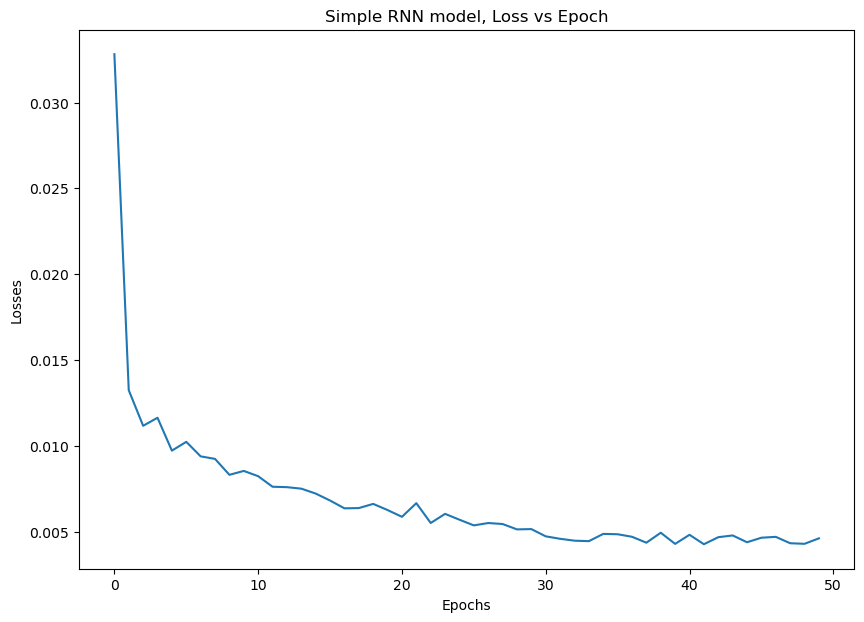

In [38]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

Epoch size does not always increase accuracy. After one epoch in a neural network, all of the training data had been used to refine the models' parameters. Epoch sizes may boost precision up to a certain limit, beyond which the model begins to overfit the data.

# Model predictions for train data

In [39]:
y_pred_lstm = model.predict(X_train_shape)  # predictions
print(y_pred_lstm.shape)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm) # scaling back from 0-1 to original
y_pred_lstm.shape

52/52 [==============================] - 2s 15ms/step
(1641, 1)


(1641, 1)

In [40]:
Y_train_shape = scaler.inverse_transform(Y_train_shape) # scaling back from 0-1 to original
Y_train_shape.shape

(1641, 1)

## Creating Test Dataset from Validation Data

In [41]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (725, 1)


In [42]:
# Creating X_test and y_test
X_test = []
Y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    Y_test.append(scaled_dataset_validation[i,0])

In [43]:
# Converting to array
X_test, Y_test = np.array(X_test), np.array(Y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",Y_test.shape)

Shape of X_test before reshape : (675, 50)
Shape of y_test before reshape : (675,)


In [44]:
X_test_shape = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
Y_test_shape = np.reshape(Y_test, (-1,1))  # reshape to 2D array

In [45]:
print("Shape of X_test after reshape :",X_test_shape.shape)
print("Shape of y_test after reshape :",Y_test_shape.shape)

Shape of X_test after reshape : (675, 50, 1)
Shape of y_test after reshape : (675, 1)


# Evaluating with Validation Data

In [51]:
# predictions with X_test data
y_pred_of_lstm_test = model.predict(X_test_shape)
# scaling back from 0-1 to original
y_pred_of_lstm_test = scaler.inverse_transform(y_pred_of_lstm_test) 
print("gg")

22/22 [==============================] - 1s 15ms/step
gg


In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test_shape, y_pred_of_lstm_test))
print("Shape of y_test after reshape :",Y_test_shape.shape)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Shape of y_test after reshape : (675, 1)
Root Mean Squared Error (RMSE): 315.61734727199763


I have predicted the testing data, let us visualize the final results. 

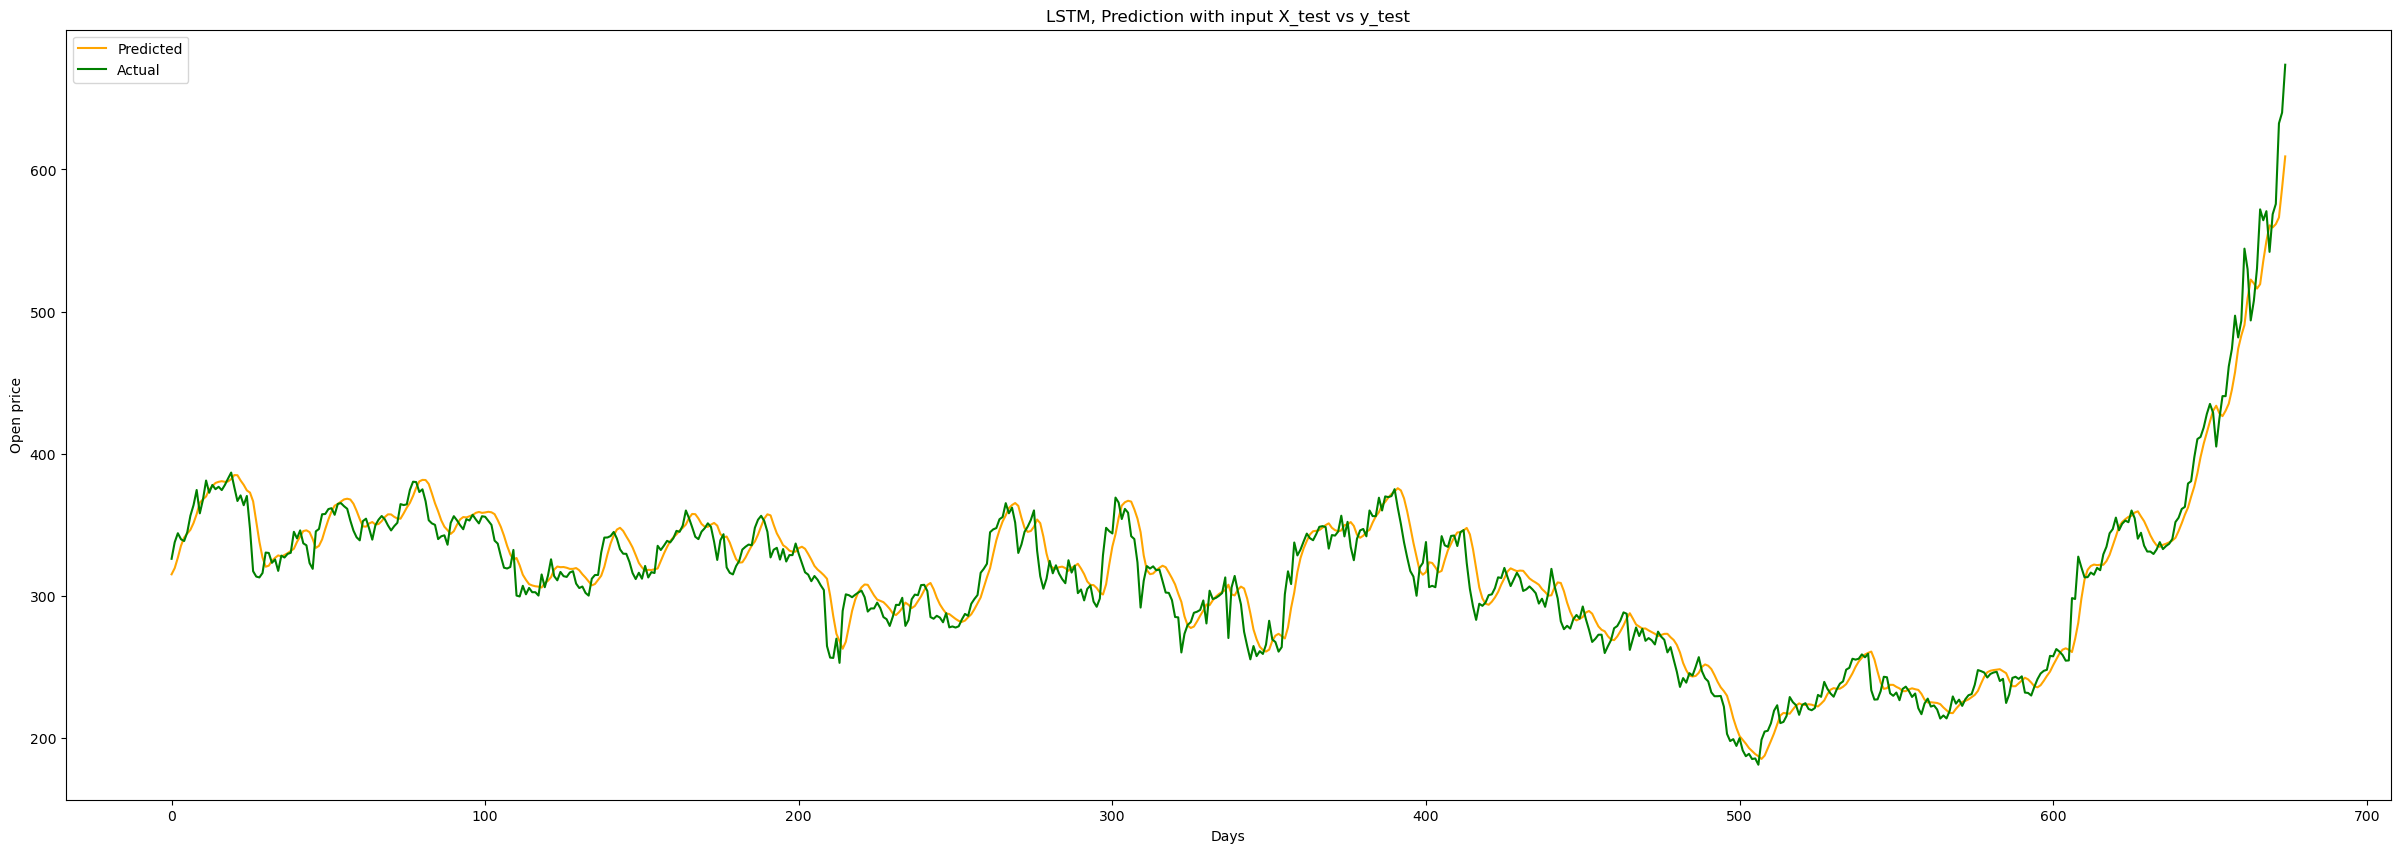

In [54]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_lstm_test, label = "Predicted", c = "orange")
plt.plot(scaler.inverse_transform(Y_test_shape), label = "Actual", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [52]:
# First we need to save a model
model.save("model.h5")

# Load model
new_model = tf.keras.models.load_model("./model.h5")

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Future price prediction

In [53]:
df.iloc[-1]

Date              2020-02-03
Open              673.690002
High              786.140015
Low                673.52002
Close                  780.0
Adj Close              780.0
Volume              47065000
year                    2020
month                      2
day                        3
is_quarter_end             0
open-close       -106.309998
low-high         -112.619995
target                     0
PriceDiff                NaN
Return                   NaN
Name: 2415, dtype: object

In [56]:
X_input = df.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.08887858],
        [0.07293275],
        [0.03125275],
        [0.0433356 ],
        [0.01704957],
        [0.00499579],
        [0.00496672],
        [0.        ],
        [0.00935258],
        [0.02425283],
        [0.00996251],
        [0.01626537],
        [0.02088356],
        [0.03067181],
        [0.06529382],
        [0.07412361],
        [0.0919283 ],
        [0.09628509],
        [0.14403554],
        [0.14879901],
        [0.19727559],
        [0.23494732],
        [0.23927504],
        [0.25838679],
        [0.28612509],
        [0.30671818],
        [0.28868109],
        [0.21958234],
        [0.27622064],
        [0.32269309],
        [0.32260596],
        [0.38339771],
        [0.41912346],
        [0.4870894 ],
        [0.44262108],
        [0.47663308],
        [0.62406695],
        [0.58195129],
        [0.47735921],
        [0.51761593],
        [0.58337448],
        [0.70431908],
        [0.68212844],
        [0.70065934],
        [0.61747362],
        [0

In [60]:

LSTM_prediction = scaler.inverse_transform(model.predict(X_input))

print("LSTM prediction, Open price prediction for 2020-02-04 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 54ms/step
LSTM prediction, Open price prediction for 2020-02-04 : 630.40424
